In [6]:
%config IPCompleter.greedy=True
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [7]:
line_data_1 = {
    'report date': ['2019-12-01','2020-01-01','2020-02-01','2020-03-01','2020-04-01']
    ,'cases': [181,272,336,450,117]
    ,'retail sales': [339,445,665,540,239]
}

# calculate fin pen : cases / retail sales
line_data_1['fin pen'] = []
for i in range(len(line_data_1['cases'])):
    line_data_1['fin pen'].append(round(line_data_1['cases'][i]/line_data_1['retail sales'][i]*100,2))

# calculate upper quartile bases on fin pen

line_data_1['uQfinpen'] = []

for j in range(len(line_data_1['fin pen'])):
    line_data_1['uQfinpen'].append(np.percentile(line_data_1['fin pen'], 75))
    
df_line = pd.DataFrame(line_data_1)
df_line['report date'] = pd.to_datetime(df_line['report date'])
df_line

,report date,cases,retail sales,fin pen,uQfinpen
0,2019-12-01,181,339,53.39,61.12
1,2020-01-01,272,445,61.12,61.12
2,2020-02-01,336,665,50.53,61.12
3,2020-03-01,450,540,83.33,61.12
4,2020-04-01,117,239,48.95,61.12


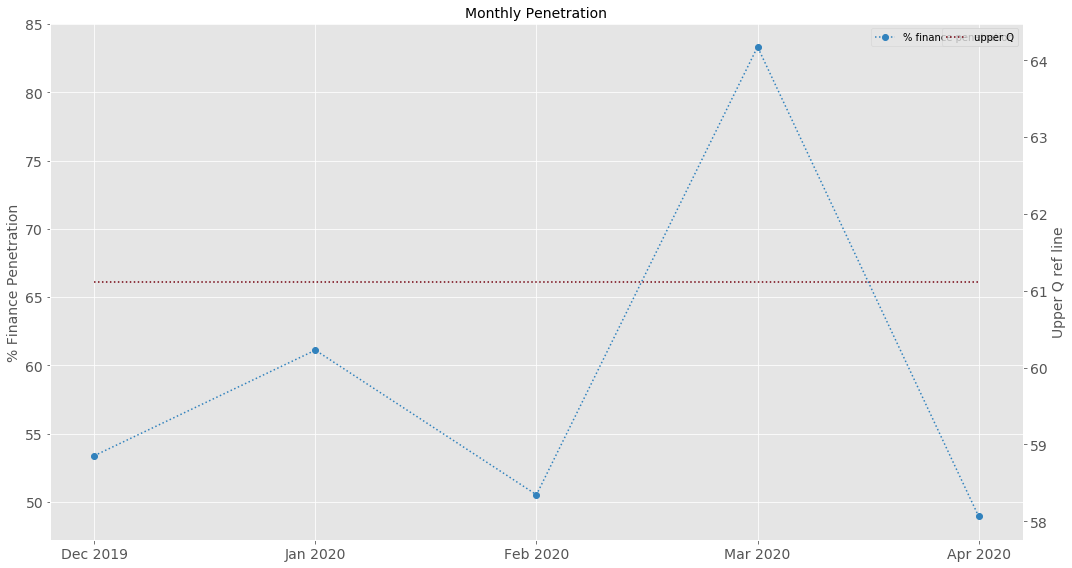

In [8]:
#line chart with reference line

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(df_line['report date']))
x_label = df_line['report date'].dt.strftime('%b %Y')
line_1 = ax.plot_date(x, df_line['fin pen'], linestyle='dotted', color='#3182bd',label='% finance penetration')
ax1 = ax.twinx()
ref_line = ax1.plot(x, df_line['uQfinpen'],linestyle='dotted', color='#73000d',label='upper Q')
ax.set_ylabel('% Finance Penetration',fontsize=14)
ax1.set_ylabel('Upper Q ref line', fontsize=14)
ax1.grid(False)
ax.set_title('Monthly Penetration', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(x_label, fontsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax.legend()
ax1.legend()
fig.tight_layout()
plt.show()


In [7]:
# combination chart: grouped bar chart + line chart

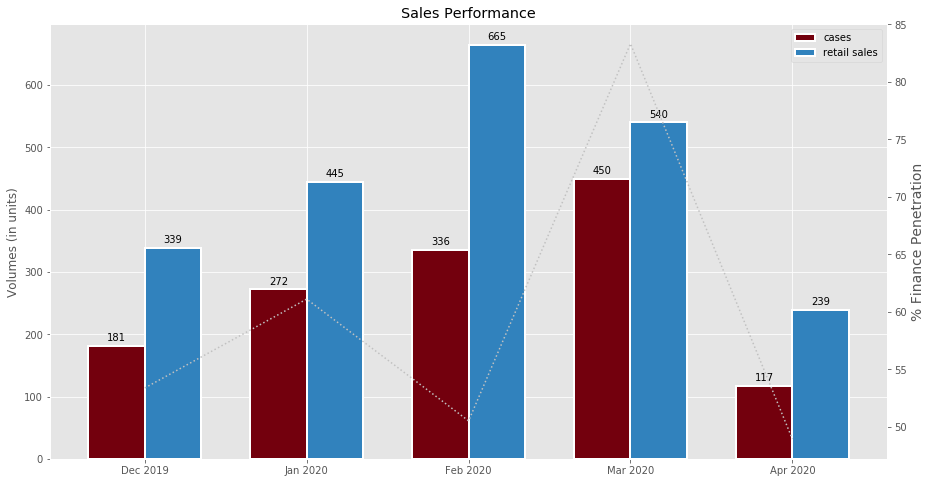

In [9]:
# create grouped bars

fig1, ax2 = plt.subplots(figsize=(15,8))
bar_width = 0.35
bar_1 = ax2.bar(x - bar_width/2, df_line['cases'], bar_width
                , color='#73000d', label='cases', edgecolor = 'white', linewidth = '2')
bar_2 = ax2.bar(x + bar_width/2, df_line['retail sales'], bar_width
                , color='#3182bd', label='retail sales', edgecolor = 'white', linewidth = '2')
ax2.set_xticks(x)
ax2.set_xticklabels(x_label)
ax2.set_ylabel('Volumes (in units)')
ax2.set_title('Sales Performance')
ax2.legend()

# create line

ax3 = ax2.twinx()
ax3.plot(x_label, df_line['fin pen'], linestyle='dotted', color='#c1c1c1',label='% finance penetration')
ax3.set_ylabel('% Finance Penetration',fontsize=14)
ax3.grid(False)

# annotation

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax2.annotate ('{}'.format(height)
                      ,xy = (bar.get_x() + bar.get_width() / 2 , height)
                      ,xytext = (0, 3)
                      ,textcoords= 'offset points'
                      ,ha = 'center'
                      ,va = 'bottom'
                      ,fontsize='10'
                     )
autolabel(bar_1)
autolabel(bar_2)


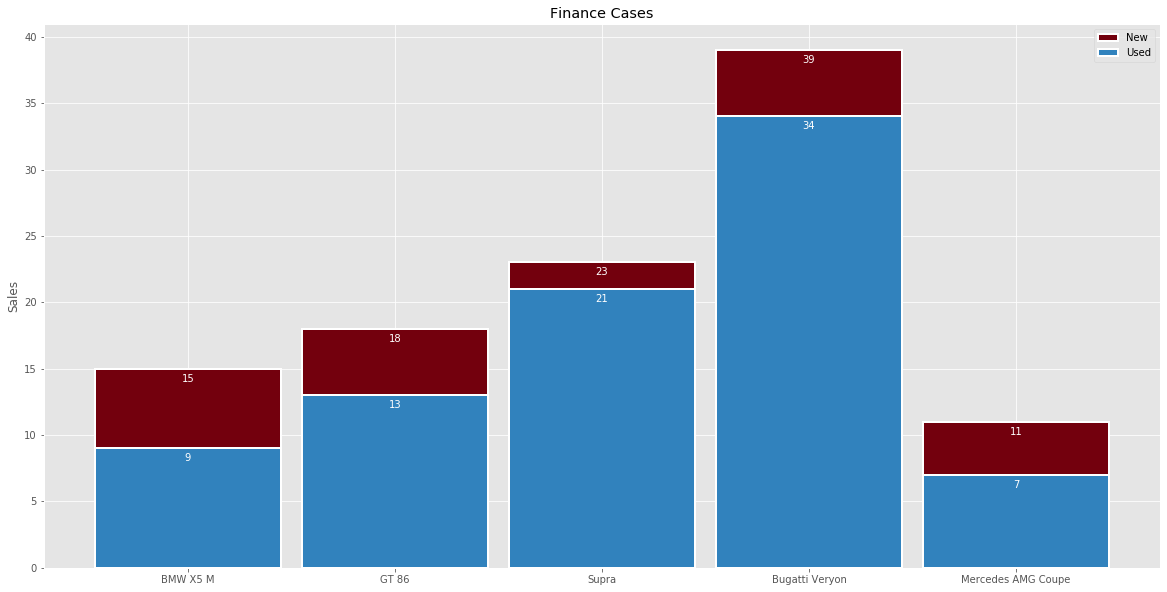

In [244]:
# create stacked bar chart

stacked_bar_data = {
    'model': ['BMW X5 M','GT 86','Supra','Bugatti Veryon','Mercedes AMG Coupe']
    ,'New': [15, 18,23,39,11]
    ,'Used': [9, 13,21,34,7]
}

# create dataframe
stacked_df = pd.DataFrame(stacked_bar_data)
# create index
stacked_df.index = stacked_df['model']
# create stacked bar x axis label
stacked_x_label = stacked_df.index

sb_x = np.arange(len(stacked_x_label))
sbfig, sbax = plt.subplots(figsize=(20,10))

sb_width = 0.90

stacked_bar_1 = sbax.bar(sb_x, stacked_bar_data['New'],
                         sb_width, color='#73000d', ec='white', linewidth = 2, label='New')
stacked_bar_2 = sbax.bar(sb_x, stacked_bar_data['Used'], 
                         sb_width, color='#3182bd', ec='white', linewidth = 2, label='Used')

sbax.set_xticks(sb_x)
sbax.set_xticklabels(stacked_x_label)
sbax.set_ylabel('Sales')
sbax.set_title('Finance Cases')

def sb_autolabel(sbars):
    for sbar in sbars:
        height = sbar.get_height()
        sbax.annotate(
            '{}'.format(height)
            ,xy = (sbar.get_x() + sb_width / 2 , height)
            ,xytext = (0,-15)
            ,textcoords = 'offset points'
            ,ha = 'center'
            ,va = 'bottom'
            ,color='white'
        )
sb_autolabel(stacked_bar_1)
sb_autolabel(stacked_bar_2)

plt.legend()
plt.show()

In [39]:
# create a bullet chart showing actuals against target

In [157]:
target = 553
actual = 775

In [158]:
pct_target_achieved = round(actual / target * 100,2)
pct_target_achieved

140.14

In [43]:
perfomance_cat = ['Low','Mild','Better','Good','Exceeded']

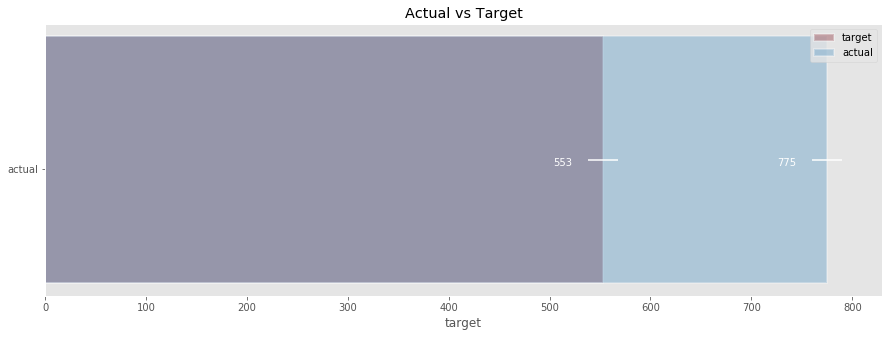

In [312]:
bulletfig, bulletax = plt.subplots(figsize=(15,5))
y_pos = 1
error = 15

#err = bulletax.errorbar()
# errorbar(self, x, y, yerr, xerr, fmt, ecolor
#          , elinewidth, capsize, barsabove, lolims, uplims, xlolims, xuplims, errorevery, capthick)
tbar = bulletax.barh(0.03,target, linewidth = 2, xerr = error
                     ,color='#73000d', ec='white', label='target', ecolor='white', alpha = 0.3)
abar = bulletax.barh(0.03,actual, linewidth = 2, xerr = error, align = 'center'
                     ,color='#3182bd', ec='white', label='actual', ecolor='white', alpha = 0.3)

bulletax.set_yticks([0])
bulletax.set_yticklabels(['actual'])
bulletax.set_xlabel('target')
bulletax.set_title('Actual vs Target')
bulletax.grid(False)

def bullet_autolabel(bulletbars):
    for bulletbar in bulletbars:
        width = bulletbar.get_width()
        bulletax.annotate(
            '{}'.format(width)
            ,xy = (bulletbar.get_width() + bulletbar.get_height() / 2, bulletbar.get_x())
            ,xytext = (-50, 3)
            ,textcoords = 'offset points'
            ,color = 'white'
        )
bullet_autolabel(tbar)
bullet_autolabel(abar)
plt.legend()
plt.show()


In [171]:
# create 100 % stacked bar chart

In [207]:
stacked_100_data = stacked_bar_data

In [229]:
# create 100 % values
stacked_100_data['Demo'] = [5,3,9,7,2]
stacked_100_data['total sales'] = []

for k in range(len(stacked_100_data['New'])):
    stacked_100_data['total sales'].append(stacked_100_data['New'][k] + stacked_100_data['Used'][k]
                                           + stacked_100_data['Demo'][k])

stacked_100_data['% New'] = []
stacked_100_data['% Used'] = []
stacked_100_data['% Demo'] = []

for l in range(len(stacked_100_data['New'])):
    stacked_100_data['% New'].append(round(stacked_100_data['New'][l]
                                           /stacked_100_data['total sales'][l] * 100,0))
    stacked_100_data['% Used'].append(round(stacked_100_data['Used'][l]
                                            /stacked_100_data['total sales'][l] * 100,0))
    stacked_100_data['% Demo'].append(round(stacked_100_data['Demo'][l]
                                      /stacked_100_data['total sales'][l] * 100,0))

stacked_100_df = pd.DataFrame(stacked_100_data)
stacked_100_df

,model,New,Used,Demo,total sales,% New,% Used,% Demo
0,BMW X5 M,15,9,5,29,52.0,31.0,17.0
1,GT 86,18,13,3,34,53.0,38.0,9.0
2,Supra,23,21,9,53,43.0,40.0,17.0
3,Bugatti Veryon,39,34,7,80,49.0,42.0,9.0
4,Mercedes AMG Coupe,11,7,2,20,55.0,35.0,10.0


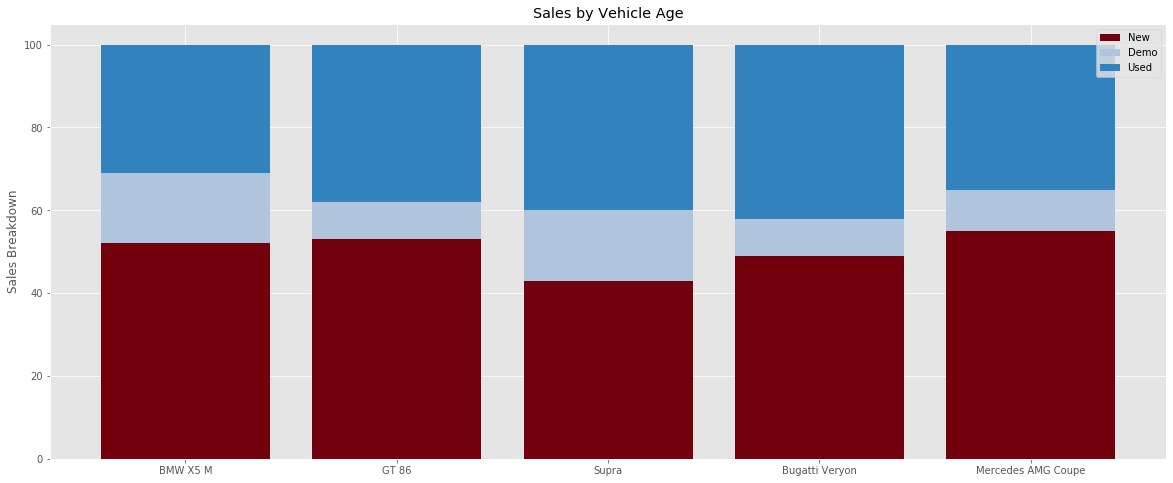

In [315]:
s100fig, s100ax = plt.subplots(1,figsize=(20,8))

# x axis ticks & labels
s100x = np.arange(len(stacked_100_df['model']))
s100_xlabel = stacked_100_df['model']
# pre-requisite for stacked bar set up
s100_bar_base = [i for i in range(len(stacked_100_df['model']))] 
s100_bar_width = 1
# stacked bar 1
s100_bar_1 = s100ax.bar(s100_bar_base, stacked_100_df['% New'], color = '#73000d', label = 'New')
# stacked bar 2
s100_bar_2 = s100ax.bar(s100_bar_base, stacked_100_df['% Demo']
                        ,bottom = stacked_100_df['% New'], color='lightsteelblue', label = 'Demo')
# stacked bar 3
s100_bar_3 = s100ax.bar(s100_bar_base, stacked_100_df['% Used']
                        , bottom = (stacked_100_df['% New'] + stacked_100_df['% Demo'])
                        , color='#3182bd', label = 'Used')

# annotate each stacked bar

# def stackedbar_autolabel(stackedbars):
#     prebar_height = 0
#     for stacked_bar in stackedbars:
#         height = stacked_bar.get_height()
#         prebar_height = height
#         s100ax.annotate(
#             '{}'.format(height)
#             ,xy = (stacked_bar.get_x() + stacked_bar.get_width() / 2, height / 2)
#             ,xytext = (0, 3)
#             ,textcoords = 'offset points'
#             ,color = 'white'
#             ,ha = 'center'
#             ,va = 'bottom'
#         )

# stackedbar_autolabel(s100_bar_1)
# stackedbar_autolabel(s100_bar_2)
# stackedbar_autolabel(s100_bar_3)
        
s100ax.legend()
s100ax.set_xticks(s100x)
s100ax.set_xticklabels(s100_xlabel)
s100ax.set_ylabel('Sales Breakdown')
s100ax.set_title('Sales by Vehicle Age')
plt.show()